## Introduction

The goal of this notebook is to guide new users in order to use the repository and generate different types of embeddings.

Below is an overview of different types of data sources used and what type of transformation was used to generate the emebddings.



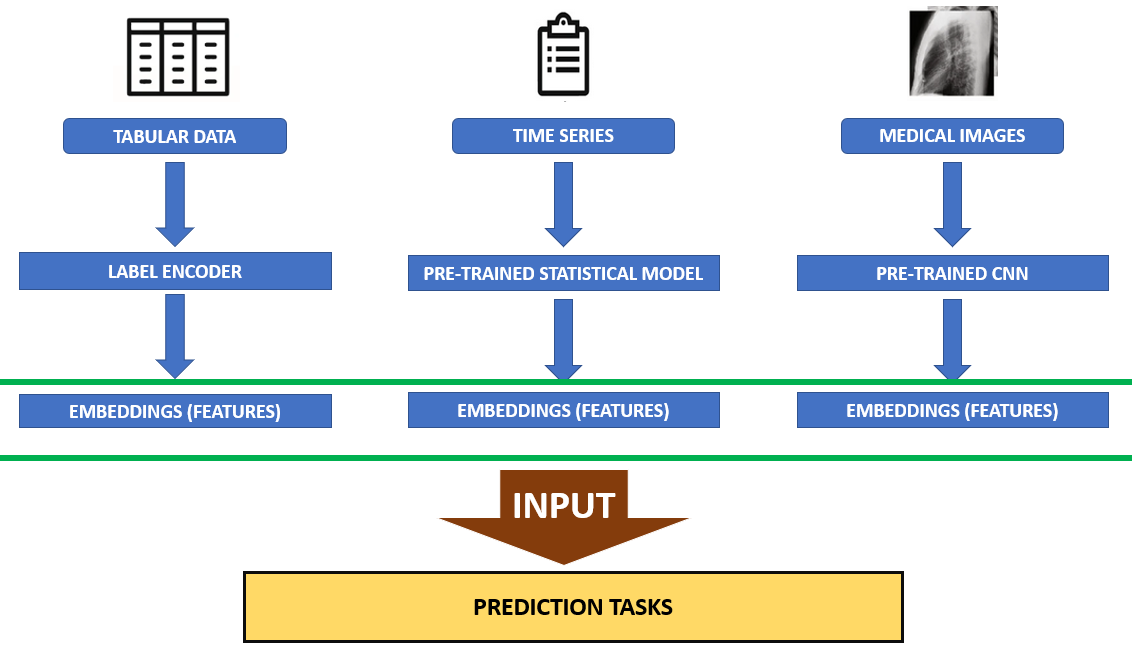



The datasets used to replicate the embeddings generation are publicly available at: physionet (https://physionet.org/content/haim-multimodal/1.0.1/)

Follow the instruction in Readme file to download and copy.

## 1-Explore your data

 Use the notebook ```general dataset exploration.ipynb``` to start exploring the different tables and understand links between them.
 
 

####  Imports


In [18]:
import os

os.chdir('../')

import pandas as pd
import numpy as np

from pandas import read_csv

from src.data import constants

#### Read data from local source
Files sould be placed in csvs folder

In [8]:
#core
df_patients = read_csv(constants.patients)
df_admissions = read_csv(constants.admissions)
df_transfers = read_csv(constants.transfers)

#mimic-cxr
df_mimic_cxr_chexpert = read_csv(constants.mimic_cxr_chexpert)
df_mimic_cxr_metadata = read_csv(constants.mimic_cxr_metadata)

#icu
df_icustays = read_csv(constants.icustays)

#for large files, use option nrows=20 to limit the number of rows:
df_chartevents =read_csv(constants.chartevents,low_memory=False, dtype={'value': 'object', 'valueuom': 'object'}, nrows=20)
df_labevents =read_csv(constants.labevents, low_memory=False, dtype={'storetime': 'object', 'value': 'object', 'valueuom': 'object', 'flag': 'object', 'priority': 'object', 'comments': 'object'}, nrows=20)
df_procedureevents =read_csv(constants.procedureevents)


Example of patients, admissions and transfers :

In [5]:
df_patients.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000048,F,23,2126,2008 - 2010,NaN
1,10002723,F,0,2128,2017 - 2019,NaN
2,10003939,M,0,2184,2008 - 2010,NaN
3,10004222,M,0,2161,2014 - 2016,NaN
4,10005325,F,0,2154,2011 - 2013,NaN


In [6]:
df_admissions.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag
0,14679932,21038362,2139-09-26 14:16:00,2139-09-28 11:30:00,NaN,ELECTIVE,NaN,HOME,Other,ENGLISH,SINGLE,UNKNOWN,NaN,NaN,0
1,15585972,24941086,2123-10-07 23:56:00,2123-10-12 11:22:00,NaN,ELECTIVE,NaN,HOME,Other,ENGLISH,NaN,WHITE,NaN,NaN,0
2,11989120,21965160,2147-01-14 09:00:00,2147-01-17 14:25:00,NaN,ELECTIVE,NaN,HOME,Other,ENGLISH,NaN,UNKNOWN,NaN,NaN,0
3,17817079,24709883,2165-12-27 17:33:00,2165-12-31 21:18:00,NaN,ELECTIVE,NaN,HOME,Other,ENGLISH,NaN,OTHER,NaN,NaN,0
4,15078341,23272159,2122-08-28 08:48:00,2122-08-30 12:32:00,NaN,ELECTIVE,NaN,HOME,Other,ENGLISH,NaN,BLACK/AFRICAN AMERICAN,NaN,NaN,0


In [7]:
df_transfers.head()

,subject_id,hadm_id,transfer_id,eventtype,careunit,intime,outtime
0,14550633,24512724.0,35906369,admit,NaN,2176-10-10 01:58:40,2176-10-10 10:00:30
1,15216953,25759433.0,37381511,admit,NaN,2173-06-14 00:08:04,2173-06-14 13:35:19
2,15776555,28490372.0,34638843,admit,NaN,2187-02-01 00:09:41,2187-02-01 14:25:07
3,12248661,23426497.0,39272104,discharge,NaN,2141-12-05 14:11:09,NaN
4,14261068,20086032.0,36182135,discharge,NaN,2144-09-13 14:14:50,NaN


Examples of images and metadata : 

In [9]:
df_mimic_cxr_chexpert.head()

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10000032,56699142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,10000764,57375967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN


In [10]:
df_mimic_cxr_metadata.head()

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),postero-anterior,Erect
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,10000032,50414267,CHEST (PA AND LAT),LATERAL,3056,2544,21800506,213014.531,CHEST (PA AND LAT),lateral,Erect
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,CHEST (PA AND LAT),PA,3056,2544,21800626,165500.312,CHEST (PA AND LAT),postero-anterior,Erect
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,10000032,53189527,CHEST (PA AND LAT),LATERAL,3056,2544,21800626,165500.312,CHEST (PA AND LAT),lateral,Erect
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,10000032,53911762,CHEST (PORTABLE AP),AP,2705,2539,21800723,80556.875,CHEST (PORTABLE AP),antero-posterior,NaN


#### Number of unique subject_id in the Patient table : 

In [14]:
print(len(df_patients["subject_id"].unique()))

382278


#### Number of unique subject_id in the mimic_cxr_chexpert table : 

In [15]:
print(len(df_mimic_cxr_chexpert["subject_id"].unique()))


65379


#### Number of unique dicom_id and subject_id in the mimic_cxr_metadata table : 

In [16]:
print(len(df_mimic_cxr_metadata["dicom_id"].unique()))
print(len(df_mimic_cxr_metadata["subject_id"].unique()))

print(len(df_mimic_cxr_metadata["subject_id"].unique()))

377110
65379
65379


#### Number of unique subject_id, hadm_id, stay_id in the Icustays table : 

In [17]:
print(len(df_icustays["subject_id"].unique()))
print(len(df_icustays["hadm_id"].unique()))
print(len(df_icustays["stay_id"].unique()))


53150
69211
76540


## 2-Filter out patient with icu stays and cxr data

To find out the patients with both types of data, use notebook ```icu_cxr_patients.ipynb```